In [ ]:
# Instalar Fortran magic
!pip install -U fortran-magic
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

**Nota:** La siguiente celda no produce un output en tanto solo se produce si la primera celda de codigo (Carga de fortran) no fue ejecutada. 

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Ejemplo creacion de una lista propia
myList = [14, "Metodos", 9, "Numericos", 11]
myList

[14, 'Metodos', 9, 'Numericos', 11]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Ejemplo, acceso a los elementos de la lista
horaInicio = myList[2]
horaFin = myList[4]
print(myList[1], myList[3], "ocurre de", horaInicio, "a", horaFin)

Metodos Numericos ocurre de 9 a 11


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Ejemplo, acceso al ultimo elemento de la lista
horaFin = myList[-1]
print("La clase termina a las", horaFin)

La clase termina a las 11


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# Ejemplo de slicing de listas
newList = myList[1:3]
newList

['Metodos', 9]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# Ejemplo slicing para los primeros 4
firstThreeItems = myList[:4]
firstThreeItems

[14, 'Metodos', 9, 'Numericos']

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# Ejemplo slicing de listas
# Cortaremos el primer elemento de la lista, dejando solo los ultimos 4
infoMetodosNumericos = myList[1:]
infoMetodosNumericos

['Metodos', 9, 'Numericos', 11]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# Ejemplo, obtener solo los elementos de indice par
myList[::2]

[14, 9, 11]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Ejemplo, reversando una lista
myList[::-1]

[11, 'Numericos', 9, 'Metodos', 14]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Ejemplo, aumentar en 1 el elemento de una lista
# Las listas en Python son arreglos dinámicos 
print("Inicial", myList)
myList.append("Profesor German")
print("Final", myList)

Inicial [14, 'Metodos', 9, 'Numericos', 11]
Final [14, 'Metodos', 9, 'Numericos', 11, 'Profesor German']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
# Ejemplo, comprensión de listas
elementosParesUpTo10 = [x for x in range(11) if x%2==0]
elementosParesUpTo10

[0, 2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Ejemplo, creacion de un diccionario
libros = {1: "Harry Potter", 2: "Padre Rico, Padre Pobre", 3: "Ingenieria de Software"}
libros

{1: 'Harry Potter', 2: 'Padre Rico, Padre Pobre', 3: 'Ingenieria de Software'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
# Ejemplo, añadir un nuevo key al diccionario
libros[4] = "Bases de datos"
libros

{1: 'Harry Potter',
 2: 'Padre Rico, Padre Pobre',
 3: 'Ingenieria de Software',
 4: 'Bases de datos'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# Ejemplo, eliminar una llave y su valor del diccionario
del libros[1]
libros

{2: 'Padre Rico, Padre Pobre',
 3: 'Ingenieria de Software',
 4: 'Bases de datos'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
# Ejemplo, no es posible hacer slice en un diccionario
libros['Padre Rico, Padre Pobre': 'Bases de datos']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
# Ejemplo, creacion de un array en numpy
myArray = np.array([9, 11, 1, 2])
myArray

array([ 9, 11,  1,  2])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
# Ejemplo de suma de dos arreglos
data + myArray

array([10, 13,  4,  6])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 460 µs, sys: 0 ns, total: 460 µs
Wall time: 471 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 592 µs, sys: 937 µs, total: 1.53 ms
Wall time: 1.91 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 195 µs, sys: 0 ns, total: 195 µs
Wall time: 202 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# Ejemplo, los arreglos de numpy no permiten distintos tipos de datos
myArray[1] = "Metodos numericos"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# Ejemplo, el arreglo tiene un espacio limitado, no puede crecer
myArray.append(15)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

In [ ]:
# Ejemplo, reformar un arreglo de numpy
# Lo convertimos en una matriz de 2x2
dosxdos = myArray.reshape(2,2)
dosxdos

array([[ 9, 11],
       [ 1,  2]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
import numpy as np

In [ ]:
# Ejemplo, reshaping de un arreglo
datos = np.arange(21).reshape(3, 7)
datos

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Ejemplo, operadores binarios
datos + datos

array([[ 0,  2,  4,  6,  8, 10, 12],
       [14, 16, 18, 20, 22, 24, 26],
       [28, 30, 32, 34, 36, 38, 40]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Ejemplo, funciones unarias
np.square(datos)

array([[  0,   1,   4,   9,  16,  25,  36],
       [ 49,  64,  81, 100, 121, 144, 169],
       [196, 225, 256, 289, 324, 361, 400]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Ejemplo, operaciones de comparación
(datos % 2) == 0

array([[ True, False,  True, False,  True, False,  True],
       [False,  True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False,  True]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Ejemplo, combinadores booleanos
((datos % 5 == 0) & ((datos % 2) == 0))

array([[ True, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False, False, False, False, False,  True]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
# Ejemplo, multiplicacion de matrices
datos @ datos.T

array([[  91,  238,  385],
       [ 238,  728, 1218],
       [ 385, 1218, 2051]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Ejemplo, operaciones sobre subsets
sines = np.sin(np.linspace(0, 180, 10))
cosines = np.cos(np.linspace(0, 180, 10))
cosines

array([ 1.        ,  0.40808206, -0.66693806, -0.95241298, -0.11038724,
        0.86231887,  0.81418097, -0.19781357, -0.97562931, -0.59846007])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
# Ejemplo de slicing
cosines[0]

1.0

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
# Ejemplo, primeros 4 elementos
cosines[:4]

array([ 1.        ,  0.40808206, -0.66693806, -0.95241298])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Ejemplo, elementos desde el 4
cosines[4:]

array([-0.11038724,  0.86231887,  0.81418097, -0.19781357, -0.97562931,
       -0.59846007])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# Ejemplo,  Todos los elementos pares
cosines[::2]

array([ 1.        , -0.66693806, -0.11038724,  0.81418097, -0.97562931])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# Ejemplo, indexado con bools
print("cosines:\n", cosines)
print("cosines > 0.6:\n", cosines > 0.6)
print("cosines[cosines > 0.6]:\n", cosines[cosines > 0.6])

cosines:
 [ 1.          0.40808206 -0.66693806 -0.95241298 -0.11038724  0.86231887
  0.81418097 -0.19781357 -0.97562931 -0.59846007]
cosines > 0.6:
 [ True False False False False  True  True False False False]
cosines[cosines > 0.6]:
 [1.         0.86231887 0.81418097]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Ejemplo, indexado de listas
cosines[[0, 2, 3]]

array([ 1.        , -0.66693806, -0.95241298])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
# Ejemplo, sorting de arreglos
datosUnsort = np.array([4, 8, 5, 5, 9, 1])
datosUnsort

array([4, 8, 5, 5, 9, 1])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
# Ejemplo, sorting
sort_indices = np.argsort(datosUnsort)
sort_indices

array([5, 0, 2, 3, 1, 4])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
# Ejemplo
datosUnsort[sort_indices]

array([1, 4, 5, 5, 8, 9])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Ejemplo, sorting a traves de una permiutacion
market_caps = np.array([16, 126, 120, 55, 96])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['A', 'D', 'E', 'C', 'B'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
# Ejemplo, usando indexers.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [ ]:
# Ejemplo, imprimiendo los datos del paso anterior
print("Fechas:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Datos llenados hacia adelante", calendar[calendar.searchsorted(event_dates)])

Fechas: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Datos llenados hacia adelante ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
# Slicing sobre ejes
datos = np.arange(30).reshape(5, 6)
datos

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
# Ejemplo de slicing, primeras 3 filas y 2 cols
datos[:3, :2]

array([[ 0,  1],
       [ 6,  7],
       [12, 13]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
datos[:3, [1, -2]] # Ejemplo, primeras 3 filas y segunda y penultima columna

array([[ 1,  4],
       [ 7, 10],
       [13, 16]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
# Ejemplo, filas donde la primera columna es divisible por 3
datos[(datos[:, 0] % 3) == 0]

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0618368265852067

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
# Ejemplo, funciones de reduccion de np
datos = np.arange(50)
datos.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
# Ejemplo, reduccion de arreglos multidimensionales
datos = np.arange(50).reshape(5, 10)
datos

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [ ]:
data.mean()

14.5

In [ ]:
# Ejemplo, media de un array multidimensional
datos.mean()

24.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
# Ejemplo, promedio en el eje x
datos.mean(axis=0)

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
# Ejemplo, mean em el axis y
datos.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
# ejemplo, broadcasting
row = np.array([19, 432, 13, 44])
column = np.array([[10], [232], [33]])
print("Fila:\n", row, sep='')
print("Columna:\n", column, sep='')

Fila:
[ 19 432  13  44]
Columna:
[[ 10]
 [232]
 [ 33]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
# Ejemplo, suma de filas y columnas
row + column

array([[ 29, 442,  23,  54],
       [251, 664, 245, 276],
       [ 52, 465,  46,  77]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
# Ejemplo, broadcasting
print("Datos:\n", data, sep='')
print("Promedio:\n", data.mean(axis=0), sep='')
print("Datos - Promedio:\n", data - data.mean(axis=0), sep='')

Datos:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Promedio:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Datos - Promedio:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# Ejemplo, creación de una serie
serie = pd.Series(index=['x', 'y', 'z', 'w'], data = [10, 20, 30, 40])
serie

x    10
y    20
z    30
w    40
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# Ejemplo, acceso a indices y valores
print("Indice", serie.index)
print("Valores", serie.values)

Indice Index(['x', 'y', 'z', 'w'], dtype='object')
Valores [10 20 30 40]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# Ejemplo, uso de iloc
serie.iloc[0]

10

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Ejemplo, uso de loc para la etiqueta
serie.loc['x']

10

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# Ejemplo, slicing con ilic
serie.iloc[:2]

x    10
y    20
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Ejemplo, slicing con loc
serie.loc[:'z']

x    10
y    20
z    30
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# Ejemplo, Indexado fancy
serie.iloc[[0, -1]]

x    10
w    40
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Ejemplo, Masking con booleanos
serie.loc[serie > 25]

z    30
w    40
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
# Ejemplo, operaciones con elementos
otraserie = pd.Series({'a':10, 'b':20, 'c':20})
otraserie

a    10
b    20
c    20
dtype: int64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# Ejemplo, suma de series
serie + otraserie

a   NaN
b   NaN
c   NaN
w   NaN
x   NaN
y   NaN
z   NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Ejemplo, llenado de todos los Na con 0
(serie + otraserie).fillna(0.0)

a    0.0
b    0.0
c    0.0
w    0.0
x    0.0
y    0.0
z    0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Ejemplo, cargando datos 
import pandas as pd
appl = pd.read_csv('https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv', parse_dates=['Date'], index_col='Date')
appl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
# Ejemplo, slicing
appl.iloc[:3, :3]

,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857
2010-01-05,27.660807,30.625713,30.798571
2010-01-06,27.220825,30.138571,30.747143


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
# Ejemplo loc para un rango de fechas 
appl.loc[pd.Timestamp('2010-01-05'):pd.Timestamp('2010-01-10'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-01-05,30.625713,150476200.0
2010-01-06,30.138571,138040000.0
2010-01-07,30.082857,119282800.0
2010-01-08,30.282858,111902700.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

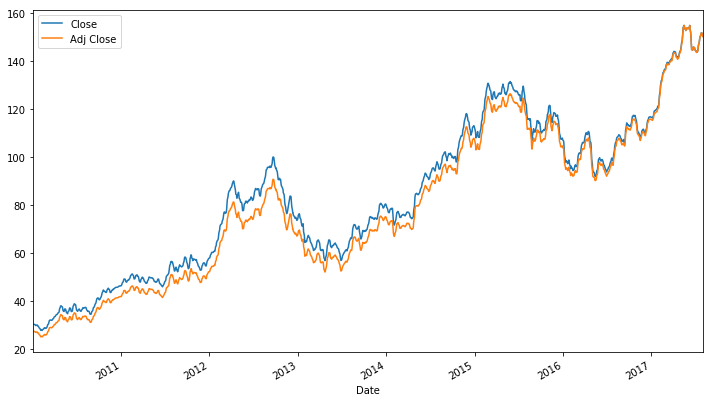

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

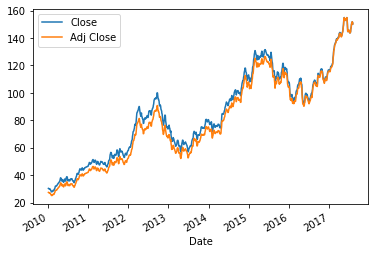

In [ ]:
# Ejemplo, rolling
appl.rolling(5)[['Close', 'Adj Close']].mean().plot();

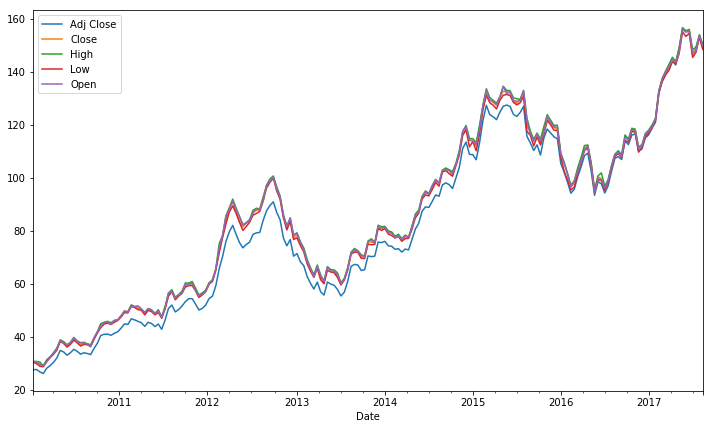

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

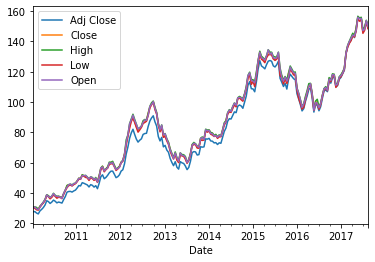

In [ ]:
# Ejemplo, eliminar el volumen en tanto afecta los datos
appl.drop('Volume', axis=1).resample('2W').max().plot();

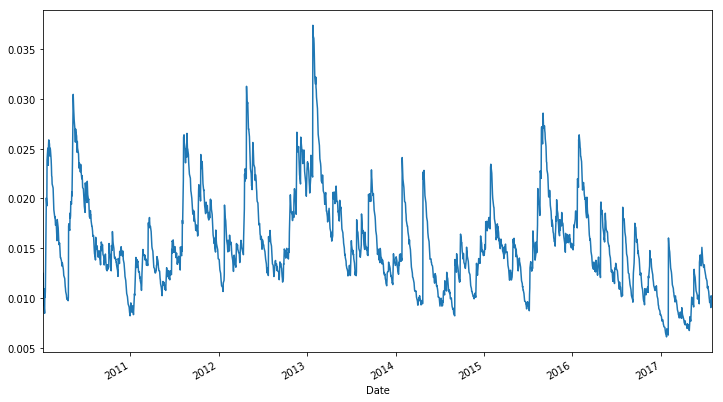

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

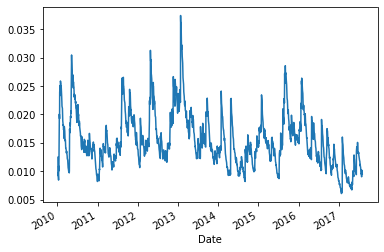

In [ ]:
# Ejemplo, rolling durante 30 dias 
appl['Close'].pct_change().ewm(span=30).std().plot();

# Carga de datos Avocado


In [ ]:
## Run this cell to test it
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 76 (delta 14), reused 23 (delta 14), pack-reused 52
Unpacking objects: 100% (76/76), done.


# "Real World" Data

In [10]:
from demos.avocados import read_avocadata
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [11]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [12]:
# Ejemplo, conocer el tipo de datos
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

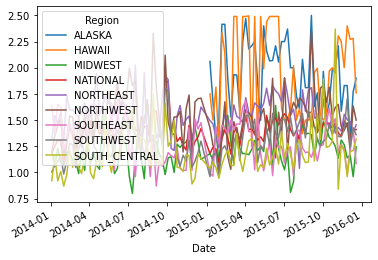

In [13]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

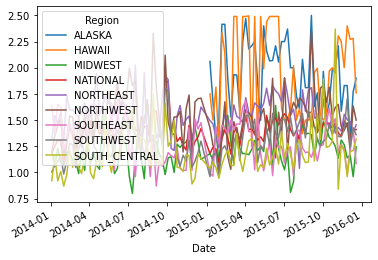

In [14]:
# Ejemplo, calcular el precio diario promedio
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [15]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

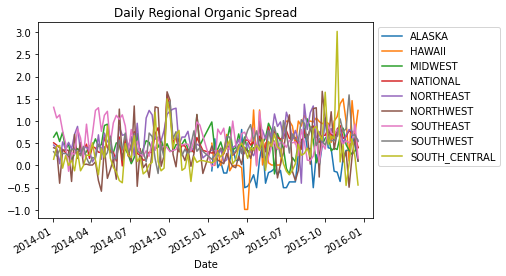

In [16]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

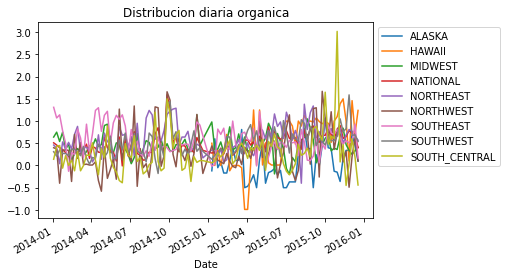

In [17]:
# Ejemplo
organic_spread_by_region(hass).plot();
plt.gca().set_title("Distribucion diaria organica");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [18]:
# Ejemplo, calculo de coeficientes de correlacion en los datos
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


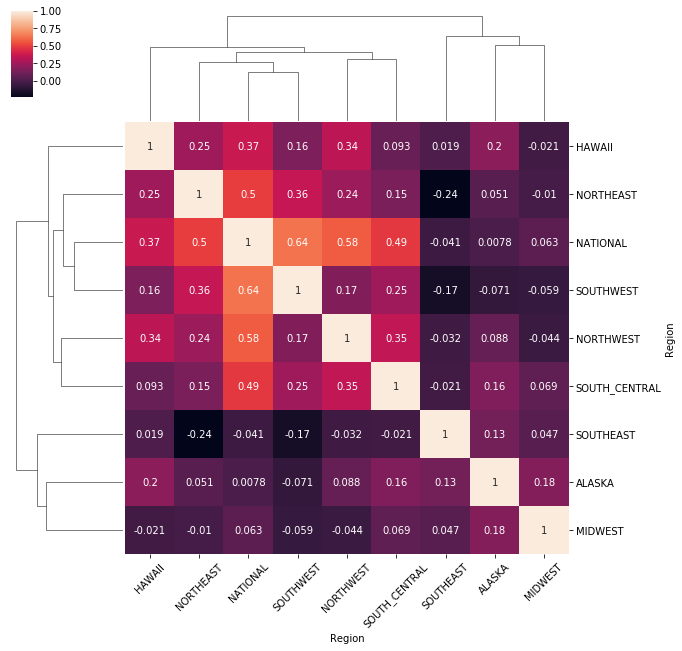

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

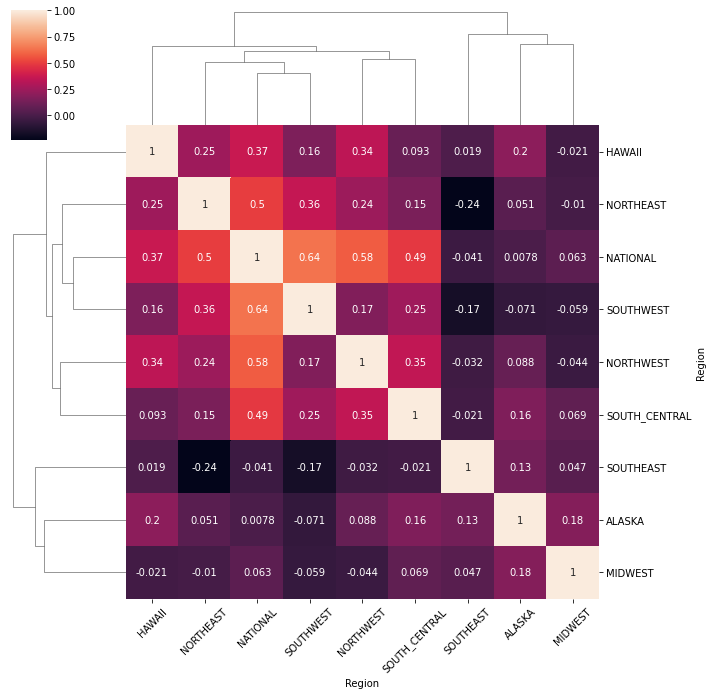

In [19]:
# Ejemplo, creación de un mapa de correlacion o heatmap
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

# Ejemplo con Datos.gov

A continuación se presenta un analisis de los precios de los medicamentos en Colombia con datos provenientes de datos.gov. Se presentan algunas visualizaciones relevantes así como otros datos importantes.

In [42]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


url = 'https://www.datos.gov.co/resource/n4dj-8r7k.csv'

datasetMedicamentos = pd.read_csv(url)
datasetMedicamentos

,expediente_invima,principio_activo,concentracion,unidad_base,unidad_de_dispensacion,nombre_comercial,fabricante,medicamento,canal,precio_por_tableta,factoresprecio,numerofactor
0,19905224,Vitamina E,Vitamina E 400 mg,mg,Tableta o cápsula,Rainforest,Votre Passion,Rainforest (Votre Passion) Tableta o cápsula |...,Comercial,$ 692.00,Medio,2
1,48599,3-(4-Metil Benciliden) Bornanona + Hidroquinona,3-(4-Metil Benciliden) Bornanona 2.5 g + Hidro...,g,Cremas o geles o ungüentos o pomadas o pastas ...,Cremoquinona,Bussié,Cremoquinona (Bussié) Cremas o geles o ungüent...,Comercial,"$ 24,651.00",Medio,2
2,7038,A/Brisbane/02/2018 (H1N1) Pdm09 - Cepa Análoga...,A/Brisbane/02/2018 (H1N1) Pdm09 - Cepa Análoga...,mcg,Solución o suspensión inyectable,Agrippal,Sepulveda Grajales John Eugenio,Agrippal (Sepulveda Grajales John Eugenio) Sol...,Comercial,"$ 71,428.00",Medio,2
3,20071968,A/Michigan/45/2015 (H1N1)Pdm09-Like Con Cepa (...,A/Michigan/45/2015 (H1N1)Pdm09-Like Con Cepa (...,mcg,Solución o suspensión inyectable,Fluquadri,Sanofi Aventis,Fluquadri (Sanofi Aventis) Solución o suspensi...,Comercial,"$ 38,976.00",Medio,2
4,20078419,A/Michigan/45/2015 (H1N1)Pdm09-Like Con Cepa (...,A/Michigan/45/2015 (H1N1)Pdm09-Like Con Cepa (...,mcg,Solución o suspensión inyectable,Fluquadri,Sanofi Aventis,Fluquadri (Sanofi Aventis) Solución o suspensi...,Comercial,"$ 38,976.00",Medio,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,29523,Cloruro De Sodio,Cloruro De Sodio 900 mg,mg,Solución o suspensión inyectable,Cloruro De Sodio,Baxter,Cloruro De Sodio (Baxter) Solución o suspensió...,Comercial,"$ 10,575.00",Medio,2
996,20083324,Clotrimazol + Dexametasona + Neomicina,Clotrimazol 1 g + Dexametasona 0.053 g + Neomi...,g,Cremas o geles o ungüentos o pomadas o pastas ...,Dermatomicol Crema,Armofar,Dermatomicol Crema (Armofar) Cremas o geles o ...,Comercial,"$ 17,057.00",Medio,2
997,19972486,Clotrimazol + Dexametasona + Neomicina,Clotrimazol 1 g + Dexametasona 40 mg + Neomici...,g,Cremas o geles o ungüentos o pomadas o pastas ...,Tor,Blaskov,Tor (Blaskov) Cremas o geles o ungüentos o pom...,Comercial,"$ 15,333.00",Medio,2
998,20066910,Clotrimazol,Clotrimazol 1 g,g,Polvos o granulados,Fungicur,Blaskov,Fungicur (Blaskov) Polvos o granulados | Tubo ...,Comercial,"$ 11,100.00",Medio,2


In [43]:
# Eliminacion de caracteres adicionales $ y ,
datasetMedicamentos['precio_por_tableta'] = datasetMedicamentos["precio_por_tableta"].str.replace("$","")
datasetMedicamentos['precio_por_tableta'] = datasetMedicamentos["precio_por_tableta"].str.replace(",","")
datasetMedicamentos["precio_por_tableta"] = datasetMedicamentos["precio_por_tableta"].astype(float)
# Precio promedio de los medicamentos listados
print("El precio promedio de los medicamentos en la lista es de", datasetMedicamentos['precio_por_tableta'].mean())
print("La desv. Estandar de los precios de los medicamentos de la lista es de", datasetMedicamentos['precio_por_tableta'].std())

El precio promedio de los medicamentos en la lista es de 221281.289
La desv. Estandar de los precios de los medicamentos de la lista es de 1420501.5116554133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


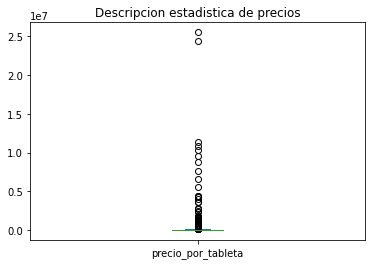

In [96]:
# Graficar el estadistico de los precios
datasetMedicamentos["precio_por_tableta"].plot.box(title="Descripcion estadistica de precios")

(-25504.755, 5101956.0]     0.990
(5101956.0, 10203907.0]     0.005
(10203907.0, 15305858.0]    0.003
(20407809.0, 25509760.0]    0.002
(15305858.0, 20407809.0]    0.000
Name: precio_por_tableta, dtype: float64


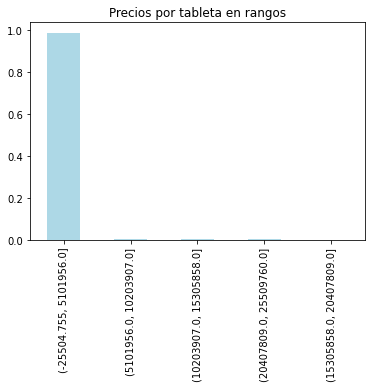

In [95]:
# Cortando  los datos en cuartiles en cuanto al precio 
out = pd.cut(datasetMedicamentos["precio_por_tableta"], 5).value_counts(normalize=True)
print(out)
out.plot.bar(color="lightblue", title="Precios por tableta en rangos")

# La mayoria de los precios de los medicamentos no superan los 5M COP

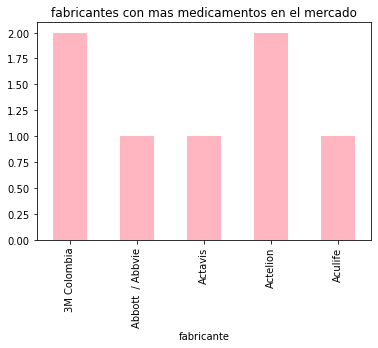

In [94]:
# Graficar los 5 fabricantes con mas medicamentos en el mercado
datasetMedicamentos.groupby(['fabricante']).size().head().plot.bar(color="lightpink", title="Fabricantes con mas medicamentos en el mercado")

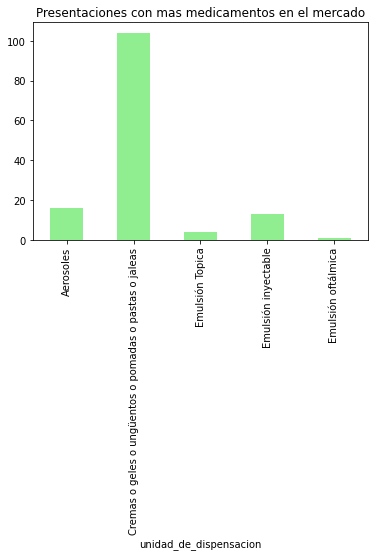

In [97]:
# Graficar las 5 presentaciones con mas medicamentos en el mercado
datasetMedicamentos.groupby(['unidad_de_dispensacion']).size().head().plot.bar(color="lightgreen", title="Presentaciones con mas medicamentos en el mercado")

Se pueden observar los diferentes precios para diferentes medicamentos en el mercado así como las presentaciones más relevantes. Además de incluir la visualización de algunos datos estadisticos.